<a href="https://colab.research.google.com/github/iamAden/Liver-Disease-Predictor/blob/main/Liver_Disease_Predictor_Model_BLues_CLuesipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **WIA1006/WID3006 Group Assignment**

**Title: Liver Disease Prediction**

> Group Name: BLues CLues

> Model Web Application:https://tang-yuenyin-liverdiseasepredictor-1--about-us-51vebm.streamlit.app/

> Group Member:
1.   Adeline Kong Earn Ning
2.   Lee Zia Qian
3.   Low Hui Yi
4.   Tang Yuen Yin
5.   Yoong Jing Yi


# **Upload Dataset from Github**

In [ ]:
# Upload dataset from github
!git clone https://github.com/HYThePro/WID3006_ML

Cloning into 'WID3006_ML'...
remote: Enumerating objects: 24, done.
remote: Counting objects: 100% (24/24), done.
remote: Compressing objects: 100% (23/23), done.
remote: Total 24 (delta 4), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (24/24), 206.62 KiB | 1.35 MiB/s, done.


# **Import Library**

In [ ]:
# Import all the needed library
# Data processing
import pandas as pd
import numpy as np

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

#Model
from sklearn import svm
from sklearn.metrics import accuracy_score, roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC, LinearSVC
from sklearn import datasets
from mlxtend.plotting import plot_decision_regions
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import learning_curve

#for saving the prediction model
import pickle as pk

# Matplotlib Configuration
%matplotlib inline

In [ ]:
# Suppress Warning
import warnings
warnings.filterwarnings('ignore')

# **Read Data**

In [ ]:
# read file
liver_data = pd.read_csv('./WID3006_ML/Dataset/Liver_Patient_Dataset.csv', encoding = 'unicode_escape')
liver_data.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkphos_Alkaline_Phosphotase,Sgpt_Alamine_Aminotransferase,Sgot_Aspartate_Aminotransferase,Total_Protiens,ALB_Albumin,A/G_Ratio_Albumin_and_Globulin_Ratio,Result
0,65.0,Female,0.7,0.1,187.0,16.0,18.0,6.8,3.3,0.90,1
1,62.0,Male,10.9,5.5,699.0,64.0,100.0,7.5,3.2,0.74,1
2,62.0,Male,7.3,4.1,490.0,60.0,68.0,7.0,3.3,0.89,1
3,58.0,Male,1.0,0.4,182.0,14.0,20.0,6.8,3.4,1.00,1
4,72.0,Male,3.9,2.0,195.0,27.0,59.0,7.3,2.4,0.40,1


In [ ]:
# Rename the column to specifiy the unit of measurement
liver_data = liver_data.rename(columns={'Total_Bilirubin': 'Total_Bilirubin (mg/dL)', 'Direct_Bilirubin': 'Direct_Bilirubin (mg/dL)',
                                        'Alkphos_Alkaline_Phosphotase': 'Alkphos_Alkaline_Phosphotase (IU/L)', 'Sgpt_Alamine_Aminotransferase' : 'Sgpt_Alamine_Aminotransferase (IU/L)',
                                        'Sgot_Aspartate_Aminotransferase' : 'Sgot_Aspartate_Aminotransferase (IU/L)', 'Total_Protiens' : 'Total_Protiens (g/dL)',
                                        'ALB_Albumin' : 'ALB_Albumin (g/dL)'})

# **Data pre-processing**

# **Step 1: Data Cleaning**

# 1.a: Dealing with missing value and duplicated data

---



---



In [ ]:
# Check if contains null or missing values
liver_data.isnull().any()

Age                                        True
Gender                                     True
Total_Bilirubin (mg/dL)                    True
Direct_Bilirubin (mg/dL)                   True
Alkphos_Alkaline_Phosphotase (IU/L)        True
Sgpt_Alamine_Aminotransferase (IU/L)       True
Sgot_Aspartate_Aminotransferase (IU/L)     True
Total_Protiens (g/dL)                      True
ALB_Albumin (g/dL)                         True
A/G_Ratio_Albumin_and_Globulin_Ratio       True
Result                                    False
dtype: bool

In [ ]:
# Display sum of null or missing values
liver_data.isnull().sum()

Age                                         2
Gender                                    902
Total_Bilirubin (mg/dL)                   648
Direct_Bilirubin (mg/dL)                  561
Alkphos_Alkaline_Phosphotase (IU/L)       796
Sgpt_Alamine_Aminotransferase (IU/L)      538
Sgot_Aspartate_Aminotransferase (IU/L)    462
Total_Protiens (g/dL)                     463
ALB_Albumin (g/dL)                        494
A/G_Ratio_Albumin_and_Globulin_Ratio      563
Result                                      0
dtype: int64

In [ ]:
liver_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31274 entries, 0 to 31273
Data columns (total 11 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Age                                     31272 non-null  float64
 1   Gender                                  30372 non-null  object 
 2   Total_Bilirubin (mg/dL)                 30626 non-null  float64
 3   Direct_Bilirubin (mg/dL)                30713 non-null  float64
 4   Alkphos_Alkaline_Phosphotase (IU/L)     30478 non-null  float64
 5   Sgpt_Alamine_Aminotransferase (IU/L)    30736 non-null  float64
 6   Sgot_Aspartate_Aminotransferase (IU/L)  30812 non-null  float64
 7   Total_Protiens (g/dL)                   30811 non-null  float64
 8   ALB_Albumin (g/dL)                      30780 non-null  float64
 9   A/G_Ratio_Albumin_and_Globulin_Ratio    30711 non-null  float64
 10  Result                                  31274 non-null  in

Text(0.5, 1.0, 'Missing Value in Liver Disease Data')

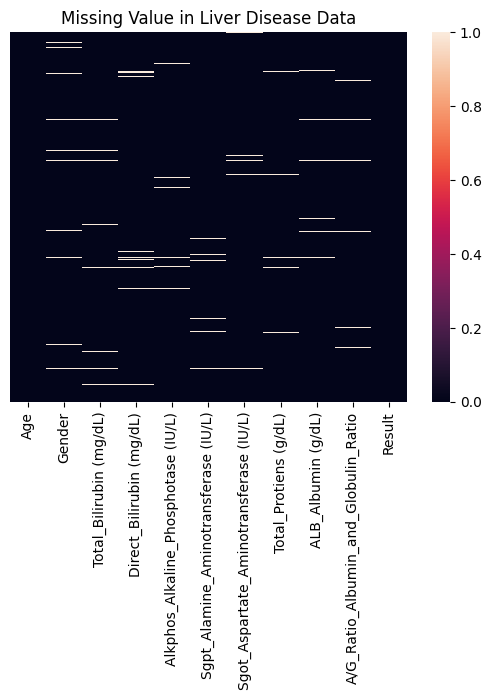

In [ ]:
# Plot the heatmap of missing value
sns.heatmap(liver_data.isnull(), yticklabels=False)
plt.title("Missing Value in Liver Disease Data")

In [ ]:
# Fill the null values with mean
liver_data.fillna({'Age' : liver_data['Age'].mean().round(0) + 0.0,
                   'A/G_Ratio_Albumin_and_Globulin_Ratio' : liver_data['A/G_Ratio_Albumin_and_Globulin_Ratio'].mean().round(2)},
                  inplace = True)
liver_data.fillna(liver_data.mean(numeric_only = True).round(1), inplace = True)

# Fill null values of gender using forward-filling
liver_data.fillna(method = 'ffill', inplace = True)

# Check if contains null values
liver_data.isnull().any()

Age                                       False
Gender                                    False
Total_Bilirubin (mg/dL)                   False
Direct_Bilirubin (mg/dL)                  False
Alkphos_Alkaline_Phosphotase (IU/L)       False
Sgpt_Alamine_Aminotransferase (IU/L)      False
Sgot_Aspartate_Aminotransferase (IU/L)    False
Total_Protiens (g/dL)                     False
ALB_Albumin (g/dL)                        False
A/G_Ratio_Albumin_and_Globulin_Ratio      False
Result                                    False
dtype: bool

In [ ]:
# Remove duplicated data
liver_data = liver_data.drop_duplicates()
liver_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19144 entries, 0 to 31148
Data columns (total 11 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Age                                     19144 non-null  float64
 1   Gender                                  19144 non-null  object 
 2   Total_Bilirubin (mg/dL)                 19144 non-null  float64
 3   Direct_Bilirubin (mg/dL)                19144 non-null  float64
 4   Alkphos_Alkaline_Phosphotase (IU/L)     19144 non-null  float64
 5   Sgpt_Alamine_Aminotransferase (IU/L)    19144 non-null  float64
 6   Sgot_Aspartate_Aminotransferase (IU/L)  19144 non-null  float64
 7   Total_Protiens (g/dL)                   19144 non-null  float64
 8   ALB_Albumin (g/dL)                      19144 non-null  float64
 9   A/G_Ratio_Albumin_and_Globulin_Ratio    19144 non-null  float64
 10  Result                                  19144 non-null  in

In [ ]:
liver_data.head()

,Age,Gender,Total_Bilirubin (mg/dL),Direct_Bilirubin (mg/dL),Alkphos_Alkaline_Phosphotase (IU/L),Sgpt_Alamine_Aminotransferase (IU/L),Sgot_Aspartate_Aminotransferase (IU/L),Total_Protiens (g/dL),ALB_Albumin (g/dL),A/G_Ratio_Albumin_and_Globulin_Ratio,Result
0,65.0,Female,0.7,0.1,187.0,16.0,18.0,6.8,3.3,0.90,1
1,62.0,Male,10.9,5.5,699.0,64.0,100.0,7.5,3.2,0.74,1
2,62.0,Male,7.3,4.1,490.0,60.0,68.0,7.0,3.3,0.89,1
3,58.0,Male,1.0,0.4,182.0,14.0,20.0,6.8,3.4,1.00,1
4,72.0,Male,3.9,2.0,195.0,27.0,59.0,7.3,2.4,0.40,1


## 1.b: Encoding Data

Encode specific data column for easy model training as some models deal easily with 0 and 1

In [ ]:
# Data encoding for 'gender' and 'result'
# Create method for encoding
def encoding (df, column, value):
  df = df.copy()
  df[column] = df[column].apply(lambda x : 1 if x == value else 0)
  return df

In [ ]:
# Encode 'gender' data
# Male -> 1, Female -> 0
liver_data = encoding(liver_data, 'Gender', 'Male')

In [ ]:
# Encode 'result' data
# Liver patient -> 1, non-liver patient -> 0
liver_data = encoding(liver_data, 'Result', 1)

In [ ]:
# Display data after encoding
liver_data.head()

,Age,Gender,Total_Bilirubin (mg/dL),Direct_Bilirubin (mg/dL),Alkphos_Alkaline_Phosphotase (IU/L),Sgpt_Alamine_Aminotransferase (IU/L),Sgot_Aspartate_Aminotransferase (IU/L),Total_Protiens (g/dL),ALB_Albumin (g/dL),A/G_Ratio_Albumin_and_Globulin_Ratio,Result
0,65.0,0,0.7,0.1,187.0,16.0,18.0,6.8,3.3,0.90,1
1,62.0,1,10.9,5.5,699.0,64.0,100.0,7.5,3.2,0.74,1
2,62.0,1,7.3,4.1,490.0,60.0,68.0,7.0,3.3,0.89,1
3,58.0,1,1.0,0.4,182.0,14.0,20.0,6.8,3.4,1.00,1
4,72.0,1,3.9,2.0,195.0,27.0,59.0,7.3,2.4,0.40,1


# Data Analysis and Visualisation

In [ ]:
# Display descriptive statistics
stats = liver_data.describe()
stats

,Age,Gender,Total_Bilirubin (mg/dL),Direct_Bilirubin (mg/dL),Alkphos_Alkaline_Phosphotase (IU/L),Sgpt_Alamine_Aminotransferase (IU/L),Sgot_Aspartate_Aminotransferase (IU/L),Total_Protiens (g/dL),ALB_Albumin (g/dL),A/G_Ratio_Albumin_and_Globulin_Ratio,Result
count,19144.000000,19144.000000,19144.000000,19144.000000,19144.000000,19144.000000,19144.000000,19144.000000,19144.000000,19144.000000,19144.000000
mean,43.798318,0.699802,3.323057,1.516956,289.579148,80.556754,110.634967,6.495090,3.140775,0.946028,0.712860
std,16.473829,0.458356,6.038097,2.830477,235.734356,179.078684,274.841182,1.078647,0.785046,0.318553,0.452439
min,4.000000,0.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,0.000000
25%,32.000000,0.000000,0.800000,0.200000,177.000000,23.000000,26.000000,5.800000,2.600000,0.700000,0.000000
50%,45.000000,1.000000,1.000000,0.300000,214.000000,36.000000,43.000000,6.500000,3.100000,0.940000,1.000000
75%,55.000000,1.000000,2.800000,1.400000,293.000000,64.000000,91.000000,7.200000,3.800000,1.100000,1.000000
max,90.000000,1.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,1.000000


In [ ]:
# Find the pairwise correlation of all columns
liver_data.corr()

,Age,Gender,Total_Bilirubin (mg/dL),Direct_Bilirubin (mg/dL),Alkphos_Alkaline_Phosphotase (IU/L),Sgpt_Alamine_Aminotransferase (IU/L),Sgot_Aspartate_Aminotransferase (IU/L),Total_Protiens (g/dL),ALB_Albumin (g/dL),A/G_Ratio_Albumin_and_Globulin_Ratio,Result
Age,1.000000,0.021806,-0.003117,-0.003416,0.001566,0.005502,0.006647,-0.009406,-0.010773,-0.009794,0.003948
Gender,0.021806,1.000000,0.011163,0.009174,-0.000565,0.007935,0.005514,0.007056,0.006378,0.003937,0.001967
Total_Bilirubin (mg/dL),-0.003117,0.011163,1.000000,0.885435,0.197282,0.204719,0.244391,0.000055,-0.219835,-0.195592,0.224453
Direct_Bilirubin (mg/dL),-0.003416,0.009174,0.885435,1.000000,0.216816,0.216400,0.255390,0.003090,-0.224415,-0.186187,0.246842
Alkphos_Alkaline_Phosphotase (IU/L),0.001566,-0.000565,0.197282,0.216816,1.000000,0.122417,0.156039,-0.022792,-0.159412,-0.226795,0.180532
Sgpt_Alamine_Aminotransferase (IU/L),0.005502,0.007935,0.204719,0.216400,0.122417,1.000000,0.756984,-0.038506,-0.025262,-0.003203,0.161405
Sgot_Aspartate_Aminotransferase (IU/L),0.006647,0.005514,0.244391,0.255390,0.156039,0.756984,1.000000,-0.025193,-0.083349,-0.066547,0.157718
Total_Protiens (g/dL),-0.009406,0.007056,0.000055,0.003090,-0.022792,-0.038506,-0.025193,1.000000,0.766578,0.218132,-0.037389
ALB_Albumin (g/dL),-0.010773,0.006378,-0.219835,-0.224415,-0.159412,-0.025262,-0.083349,0.766578,1.000000,0.668122,-0.164452
A/G_Ratio_Albumin_and_Globulin_Ratio,-0.009794,0.003937,-0.195592,-0.186187,-0.226795,-0.003203,-0.066547,0.218132,0.668122,1.000000,-0.159969


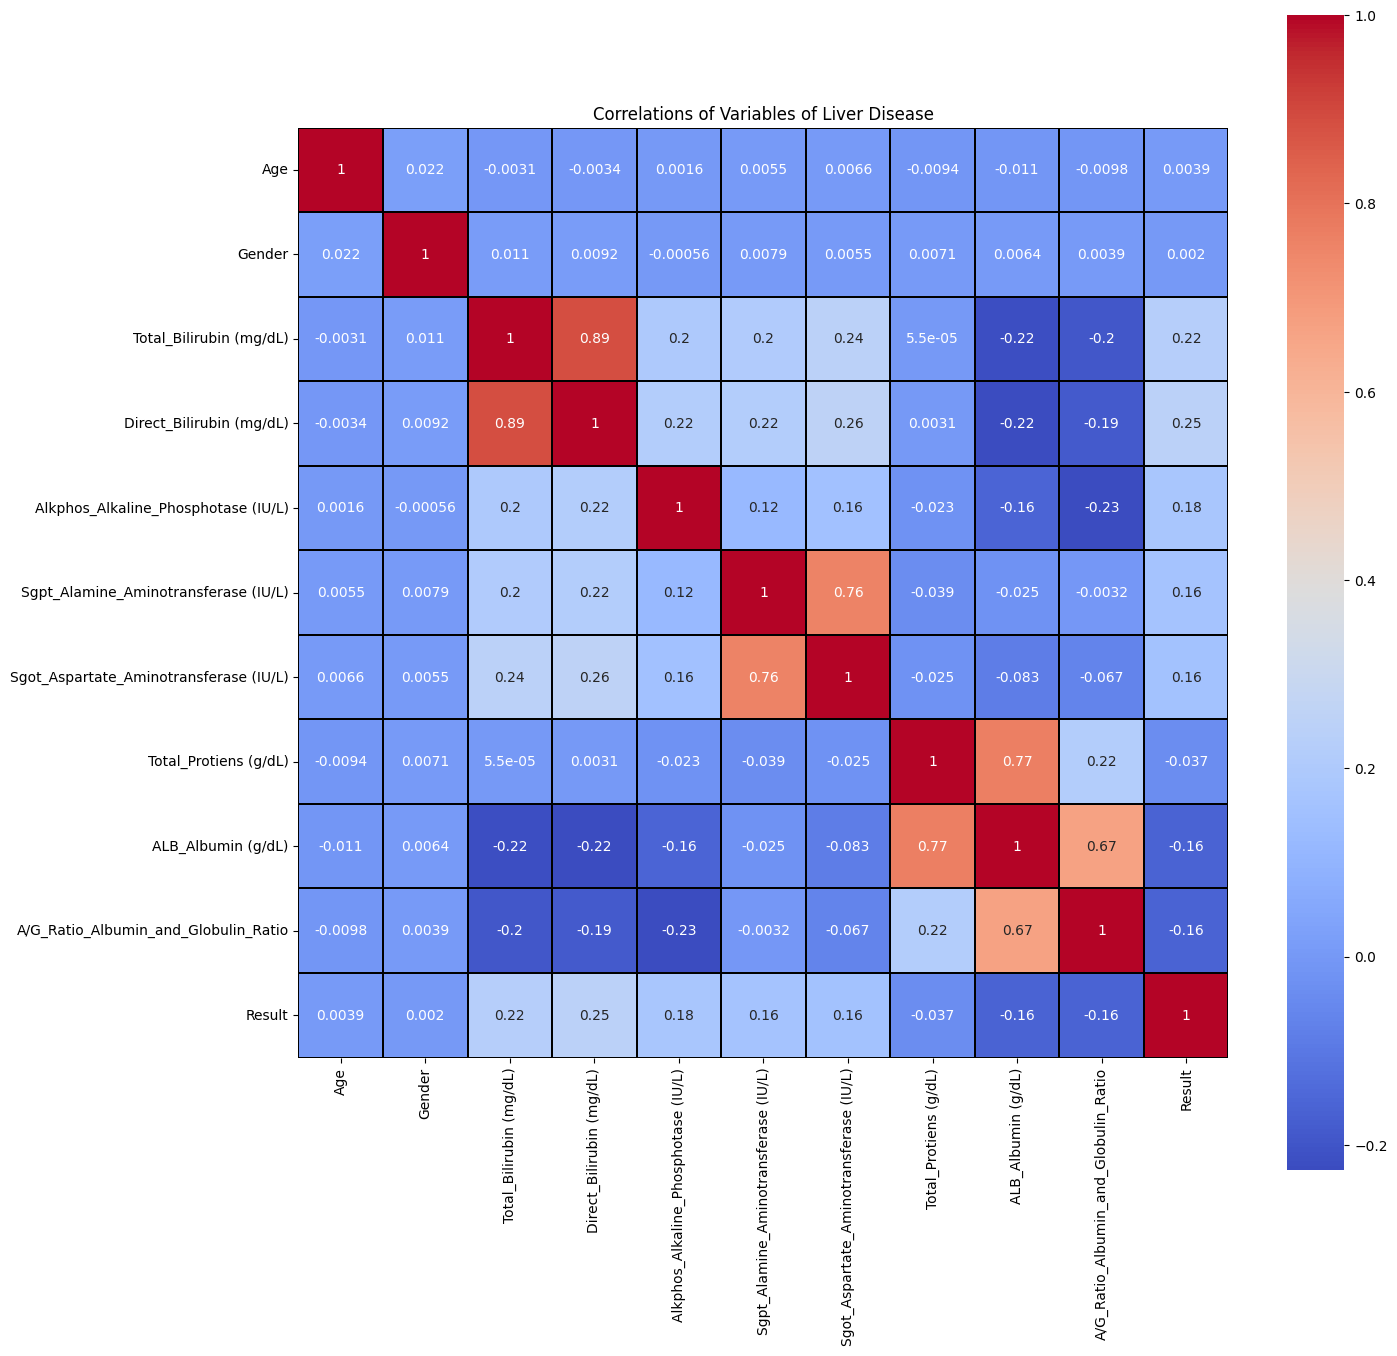

In [ ]:
plt.subplots(figsize = (15,15))
sns.heatmap(liver_data.corr(), linewidths = 0.2, linecolor = 'black', vmax = 1.0, square = True, cmap = 'coolwarm', annot = True)
plt.title('Correlations of Variables of Liver Disease')
plt.show()

array([[<Axes: xlabel='Age', ylabel='Age'>,
        <Axes: xlabel='Gender', ylabel='Age'>,
        <Axes: xlabel='Total_Bilirubin (mg/dL)', ylabel='Age'>,
        <Axes: xlabel='Direct_Bilirubin (mg/dL)', ylabel='Age'>,
        <Axes: xlabel='Alkphos_Alkaline_Phosphotase (IU/L)', ylabel='Age'>,
        <Axes: xlabel='Sgpt_Alamine_Aminotransferase (IU/L)', ylabel='Age'>,
        <Axes: xlabel='Sgot_Aspartate_Aminotransferase (IU/L)', ylabel='Age'>,
        <Axes: xlabel='Total_Protiens (g/dL)', ylabel='Age'>,
        <Axes: xlabel='ALB_Albumin (g/dL)', ylabel='Age'>,
        <Axes: xlabel='A/G_Ratio_Albumin_and_Globulin_Ratio', ylabel='Age'>,
        <Axes: xlabel='Result', ylabel='Age'>],
       [<Axes: xlabel='Age', ylabel='Gender'>,
        <Axes: xlabel='Gender', ylabel='Gender'>,
        <Axes: xlabel='Total_Bilirubin (mg/dL)', ylabel='Gender'>,
        <Axes: xlabel='Direct_Bilirubin (mg/dL)', ylabel='Gender'>,
        <Axes: xlabel='Alkphos_Alkaline_Phosphotase (IU/L)', ylabel='G

Error in callback <function _draw_all_if_interactive at 0x7fafdb1aa050> (for post_execute):


KeyboardInterrupt: ignored

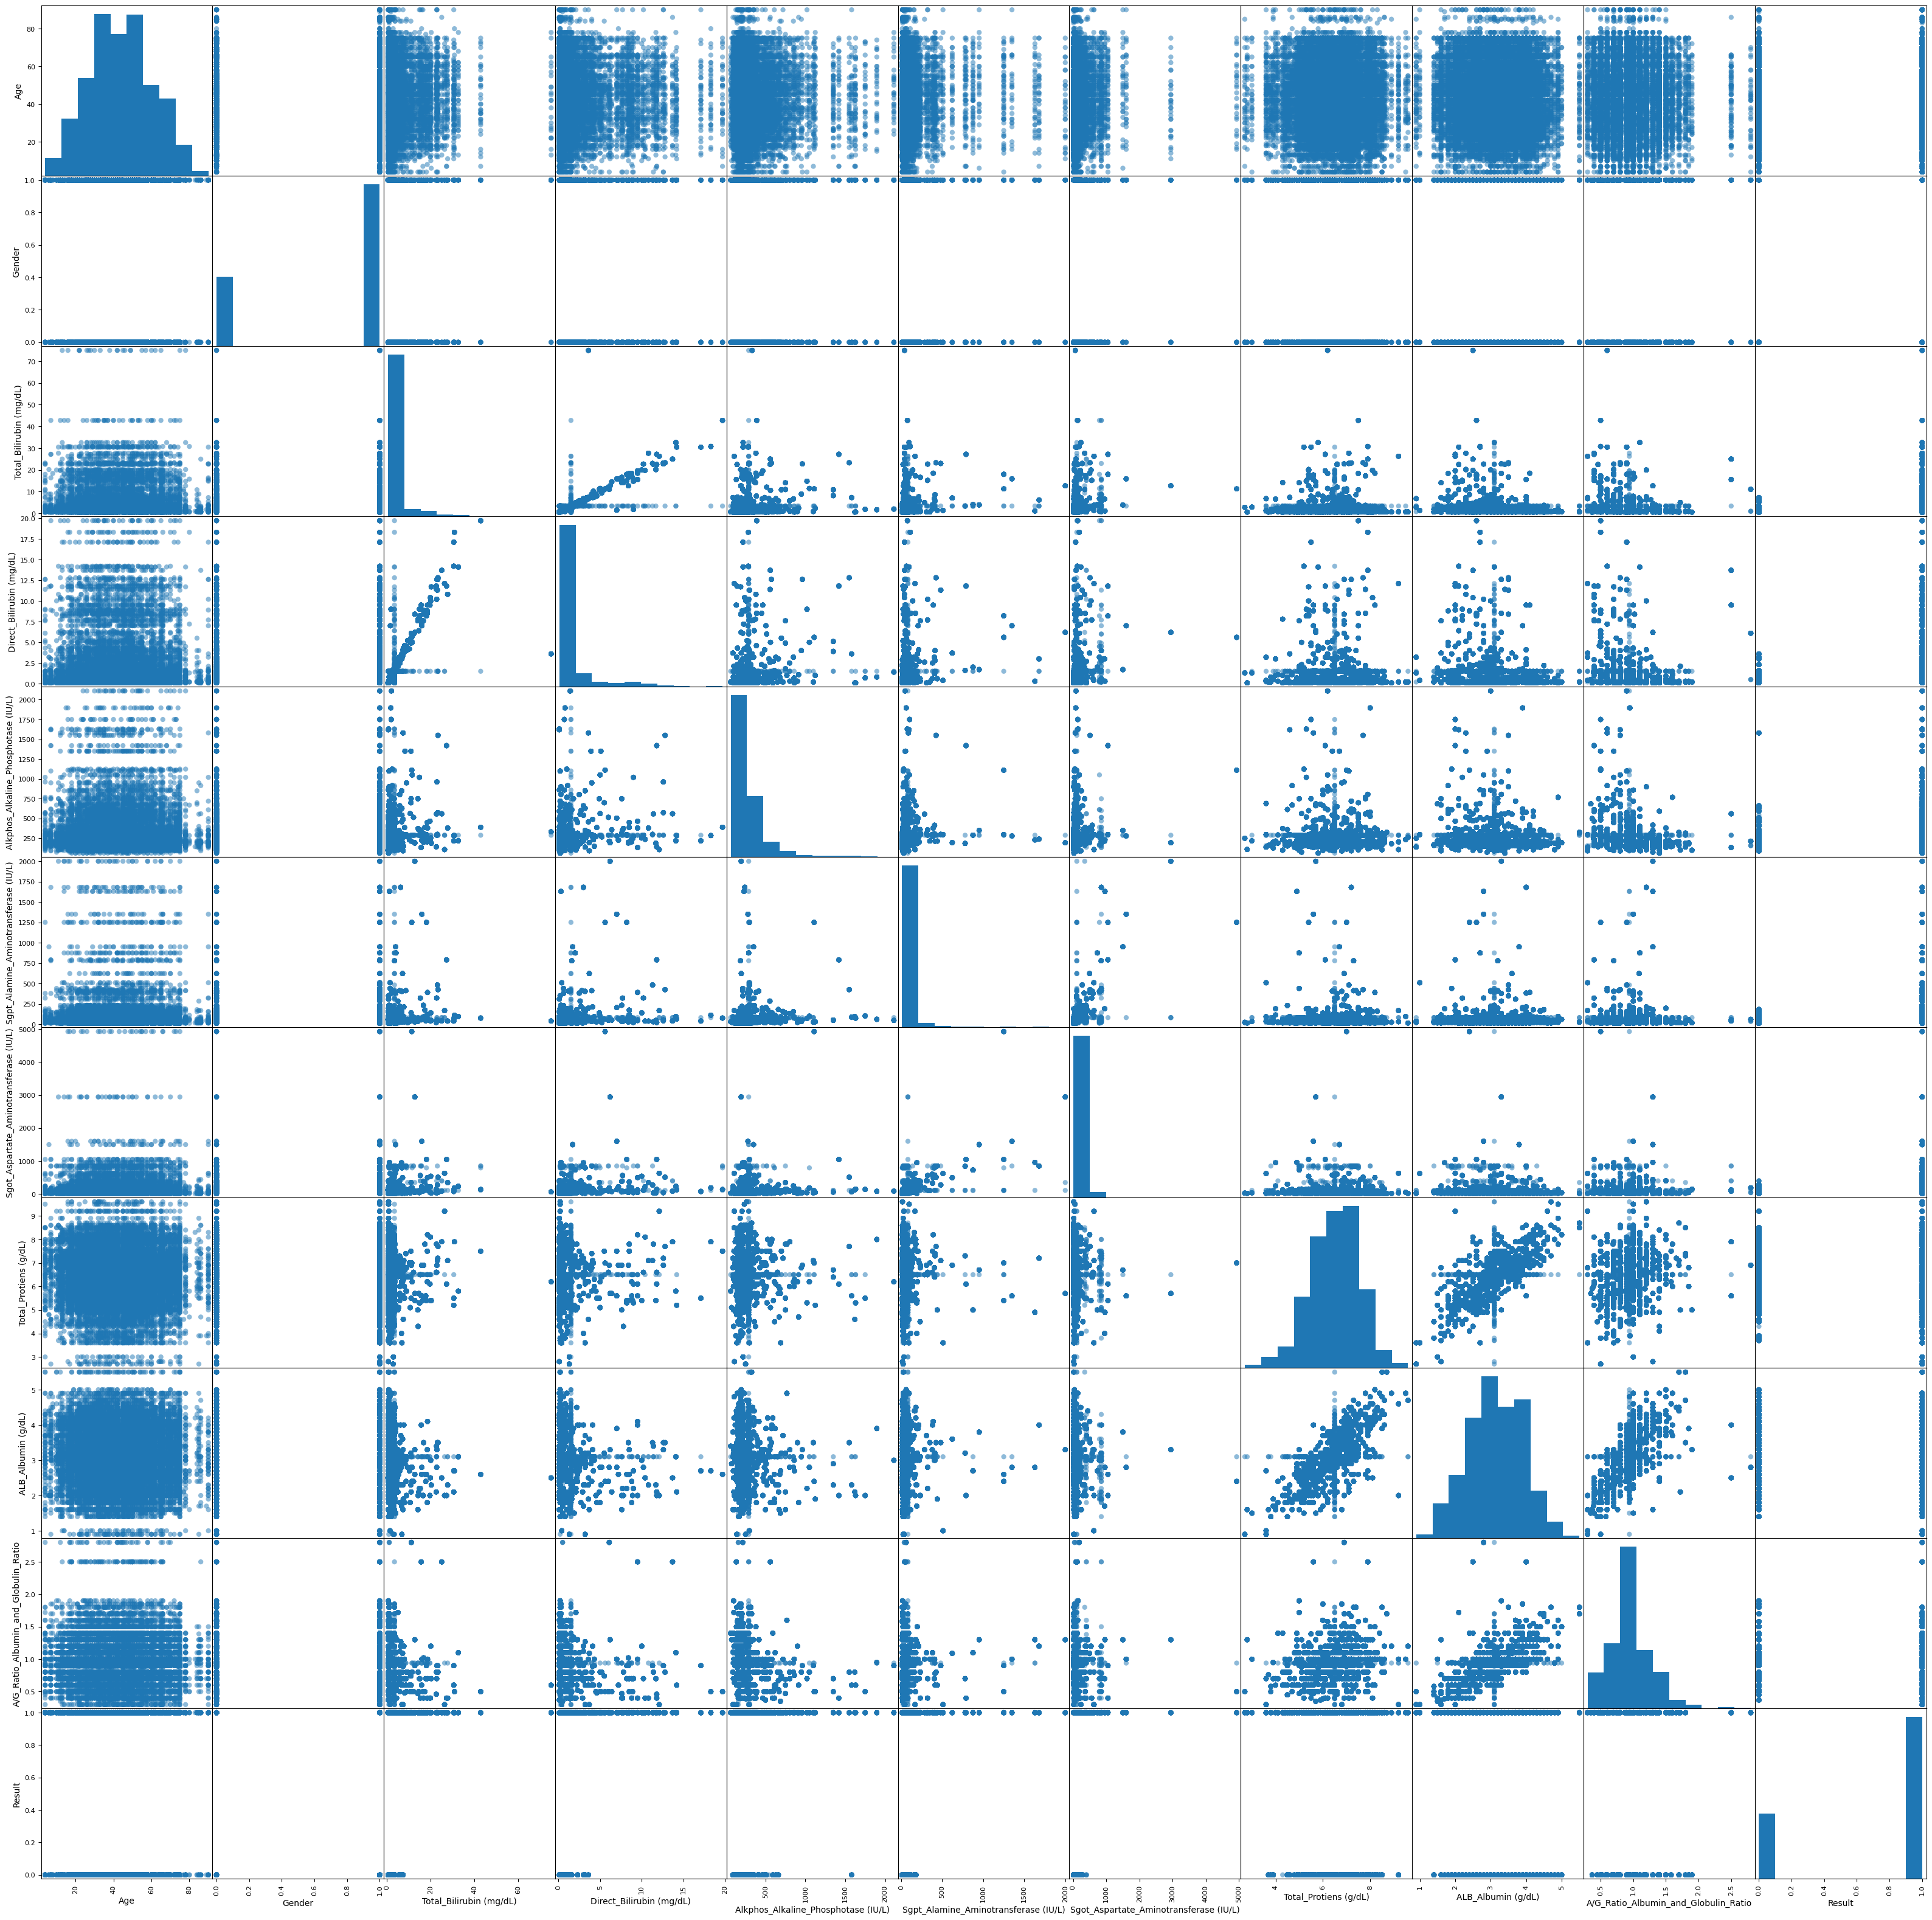

In [ ]:
# Plot scatter matrix using pandas and matplotlib
pd.plotting.scatter_matrix(liver_data, figsize = (40,40), grid = True, marker = 'o')

In [ ]:
# Plot scatter matrix using seaborn
plt.figure(figsize = (40,40))
sns.set_theme(style = "ticks")
sns.pairplot(liver_data, hue = 'Result')

Error in callback <function _draw_all_if_interactive at 0x7fafdb1aa050> (for post_execute):


KeyboardInterrupt: ignored

<Figure size 4000x4000 with 0 Axes>

Error in callback <function flush_figures at 0x7fafdb1a92d0> (for post_execute):


KeyboardInterrupt: ignored

array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Gender'}>,
        <Axes: title={'center': 'Total_Bilirubin (mg/dL)'}>],
       [<Axes: title={'center': 'Direct_Bilirubin (mg/dL)'}>,
        <Axes: title={'center': 'Alkphos_Alkaline_Phosphotase (IU/L)'}>,
        <Axes: title={'center': 'Sgpt_Alamine_Aminotransferase (IU/L)'}>],
       [<Axes: title={'center': 'Sgot_Aspartate_Aminotransferase (IU/L)'}>,
        <Axes: title={'center': 'Total_Protiens (g/dL)'}>,
        <Axes: title={'center': 'ALB_Albumin (g/dL)'}>],
       [<Axes: title={'center': 'A/G_Ratio_Albumin_and_Globulin_Ratio'}>,
        <Axes: title={'center': 'Result'}>, <Axes: >]], dtype=object)

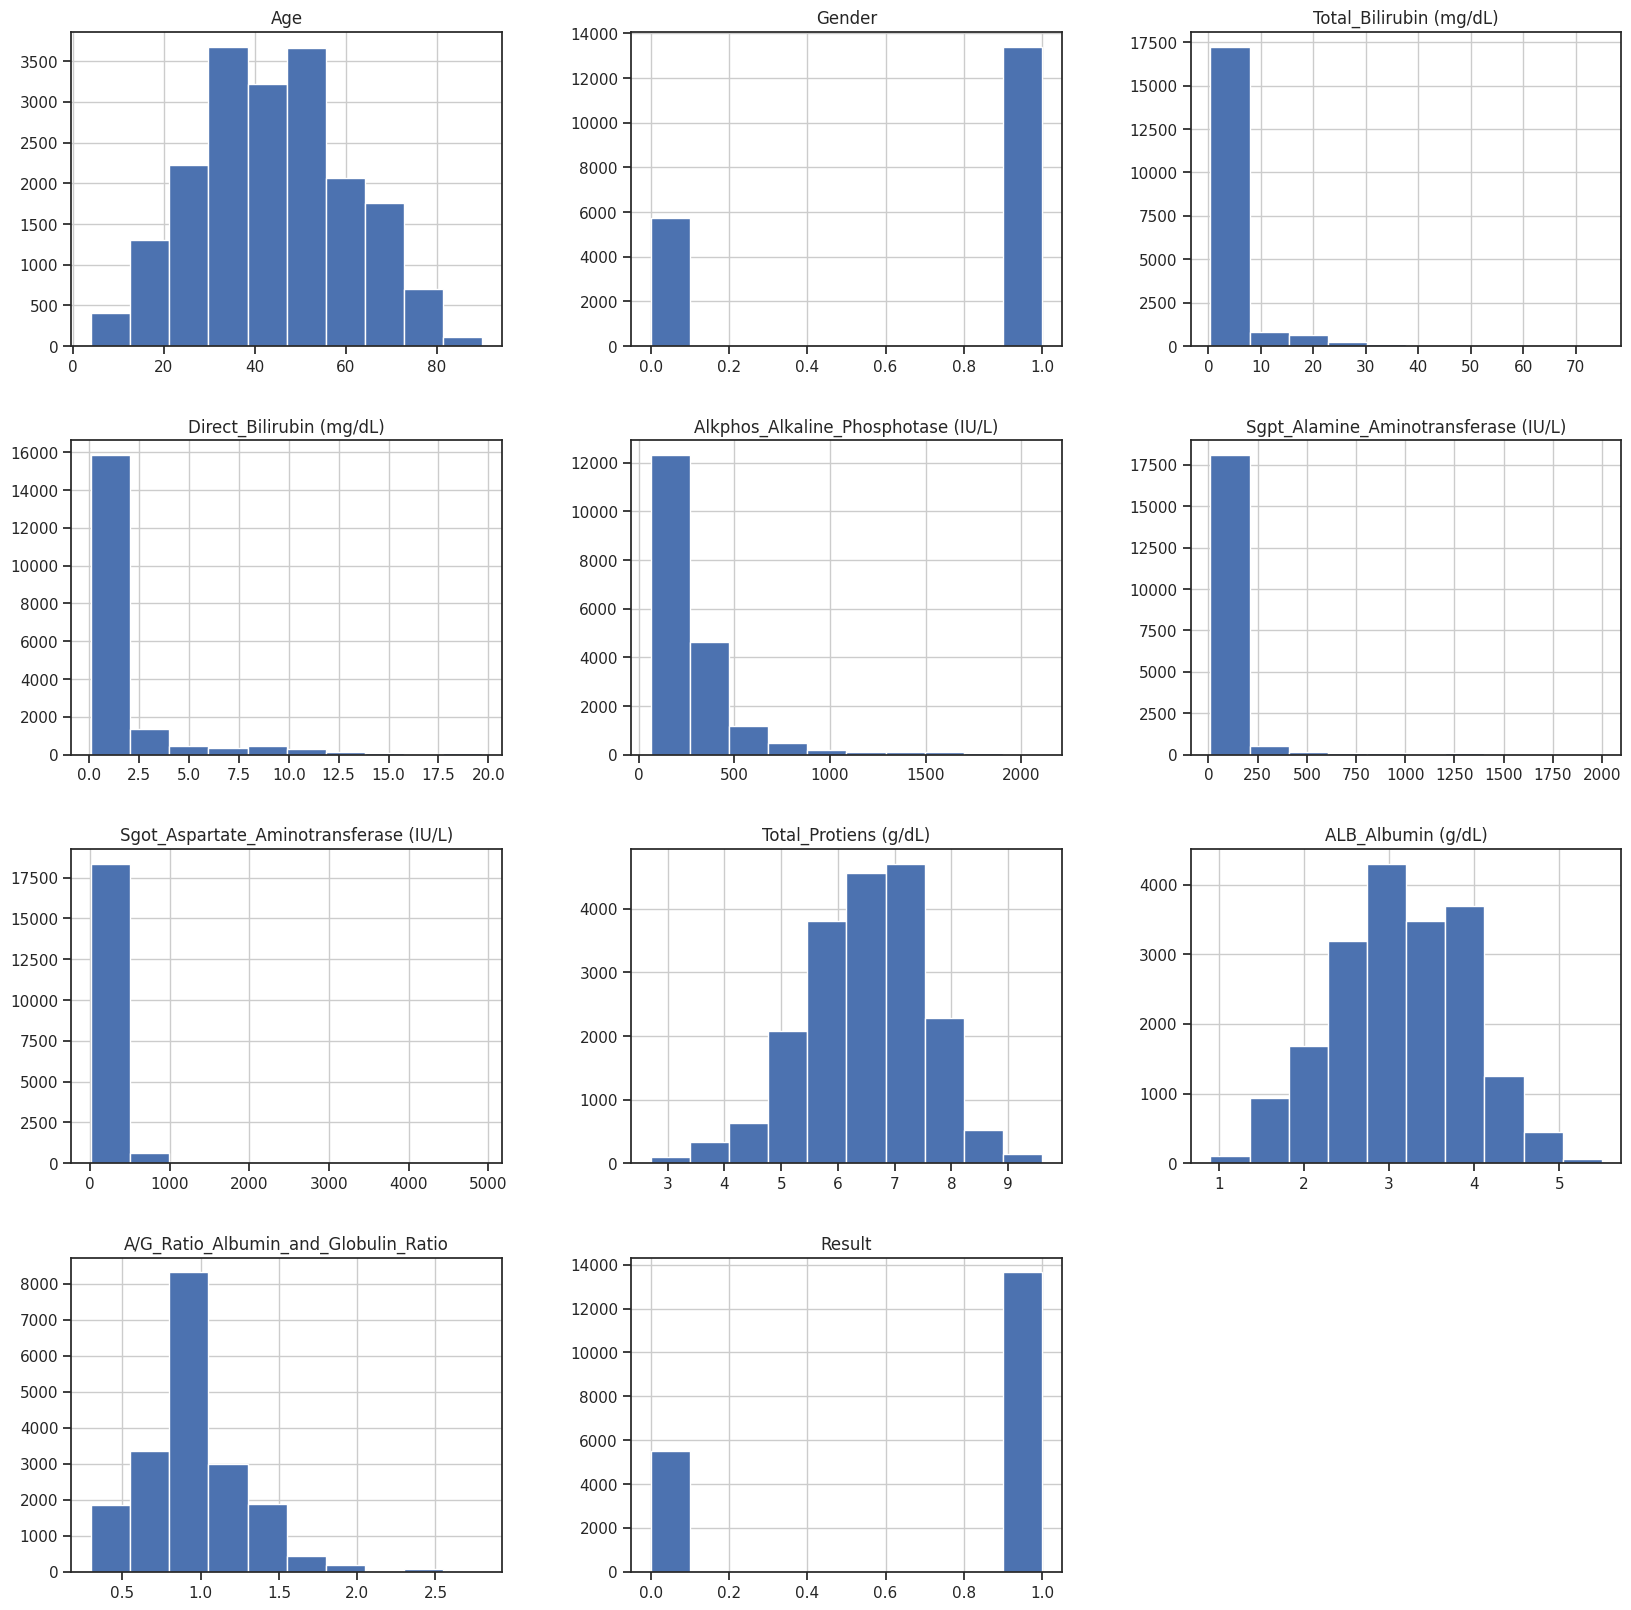

In [ ]:
# Histogram for each variable
liver_data.hist(figsize = (20,20))

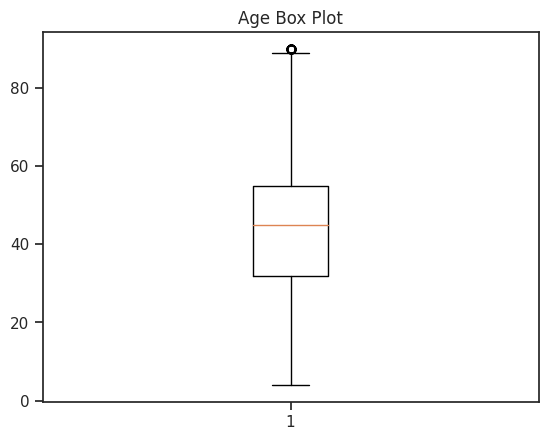

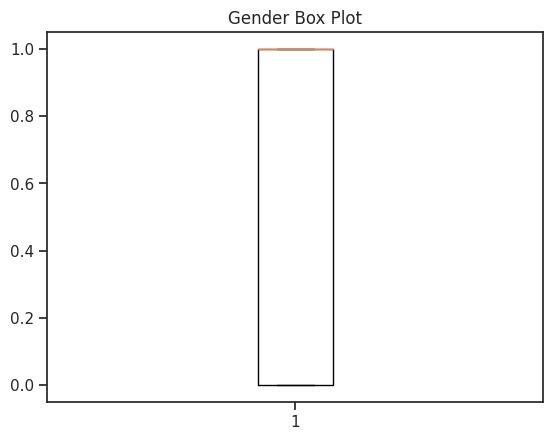

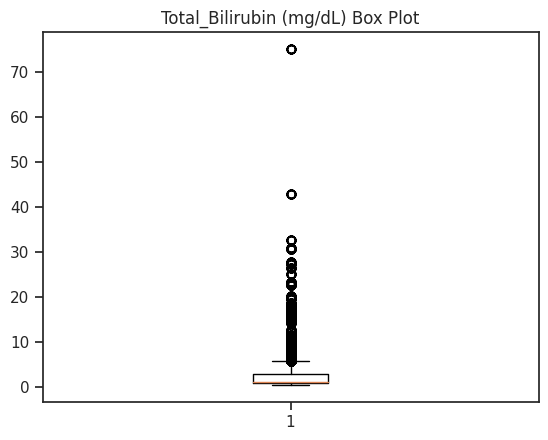

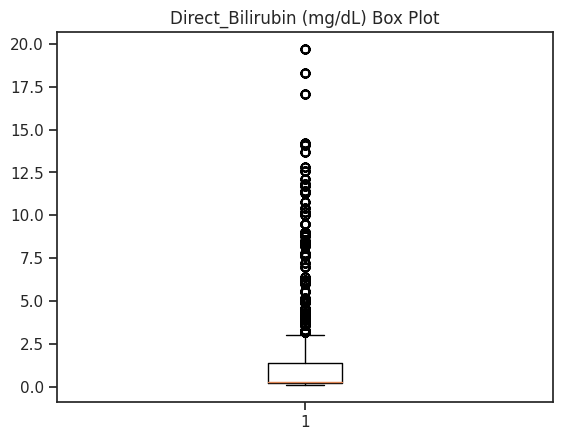

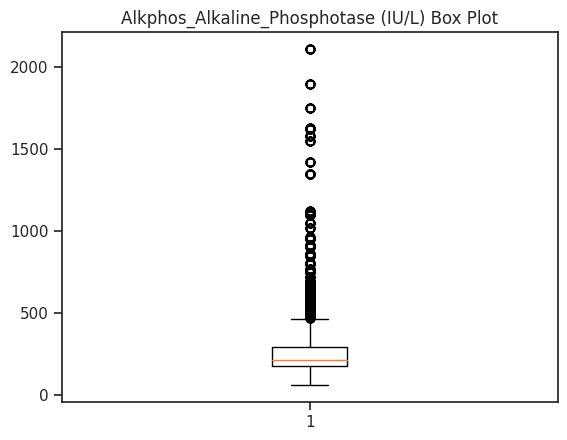

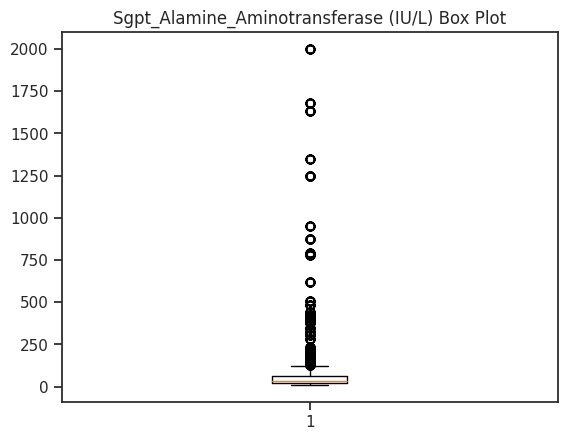

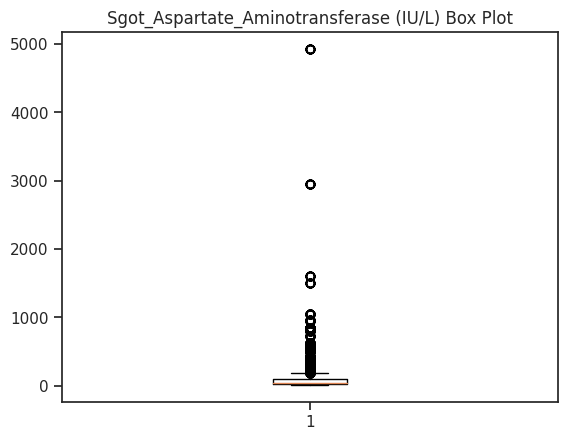

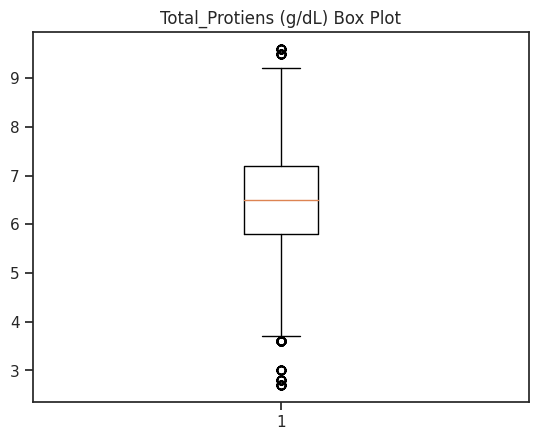

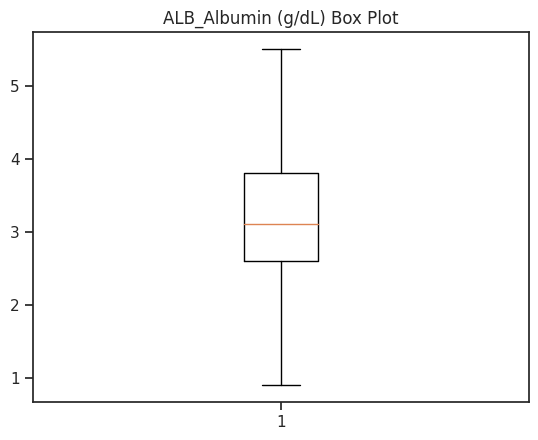

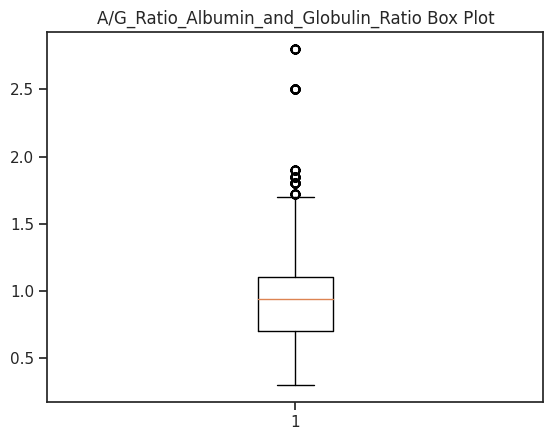

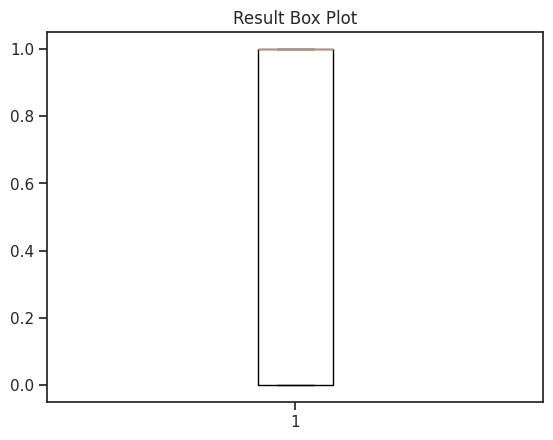

In [ ]:
# Plot box plots for every column
for col in liver_data.columns:
    plt.boxplot(liver_data[col])
    plt.title(col + " Box Plot")
    plt.show()

## 1.c: Splitting Data

In [ ]:
x = liver_data.drop(['Gender','Result','Age'], axis=1)
y = liver_data['Result']
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


# 1.d: Normalization after splitting

If you want to test with data without normalization for model training, just make the code into a comment

In [ ]:
#Normalize
X_train = X_train.apply(lambda x: (x - x.min()) / (x.max() - x.min()))
X_test = X_test.apply(lambda x: (x - x.min()) / (x.max() - x.min()))
print("Min")
print(x.min())
print()
print("Max")
print(x.max())

Min
Total_Bilirubin (mg/dL)                    0.4
Direct_Bilirubin (mg/dL)                   0.1
Alkphos_Alkaline_Phosphotase (IU/L)       63.0
Sgpt_Alamine_Aminotransferase (IU/L)      10.0
Sgot_Aspartate_Aminotransferase (IU/L)    10.0
Total_Protiens (g/dL)                      2.7
ALB_Albumin (g/dL)                         0.9
A/G_Ratio_Albumin_and_Globulin_Ratio       0.3
dtype: float64

Max
Total_Bilirubin (mg/dL)                     75.0
Direct_Bilirubin (mg/dL)                    19.7
Alkphos_Alkaline_Phosphotase (IU/L)       2110.0
Sgpt_Alamine_Aminotransferase (IU/L)      2000.0
Sgot_Aspartate_Aminotransferase (IU/L)    4929.0
Total_Protiens (g/dL)                        9.6
ALB_Albumin (g/dL)                           5.5
A/G_Ratio_Albumin_and_Globulin_Ratio         2.8
dtype: float64


#**Model Building**

 **SVM**

Model Algorithm

In [ ]:
# Create an SVM model
svm_model = SVC(kernel='linear', random_state=50)

# Fit the model to the training data
svm_model.fit(X_train, y_train)

# Use the model to make predictions on the training data and test data
y_svmpred = svm_model.predict(X_test)


Model Result Visualisation


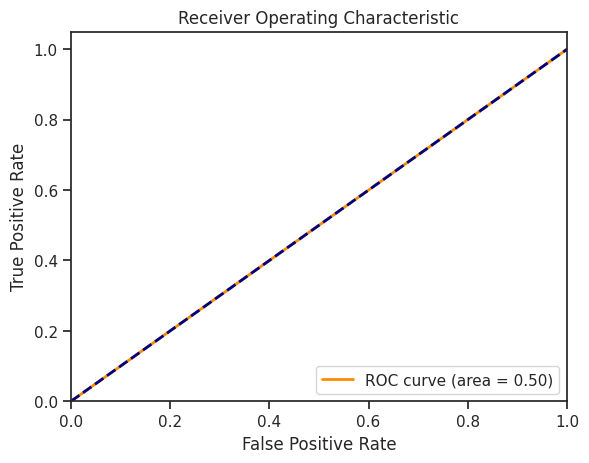

In [ ]:
# calculate the false positive rate and true positive rate
fpr, tpr, thresholds = roc_curve(y_test, y_svmpred)

# calculate the area under the curve
roc_auc = auc(fpr, tpr)

# plot the ROC curve
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

Model evaluation

In [ ]:
# Compare R2 of train and test set
svm_score=round(svm_model.score(X_train, y_train),10)
svm_scoreTest=round(svm_model.score(X_test, y_test),10)
print('SVM Score: ', svm_score)
print('SVM Test Score: ', svm_scoreTest)

SVM Score:  0.7126999674
SVM Test Score:  0.7135022199


In [ ]:
# Calculate and print the accuracy of the model
accuracysvm = accuracy_score(y_test, y_svmpred)
print("Accuracy:", accuracysvm)

Accuracy: 0.7135022199007574


Confusion Matrix is :
 [[   0 1097]
 [   0 2732]]




<Axes: >

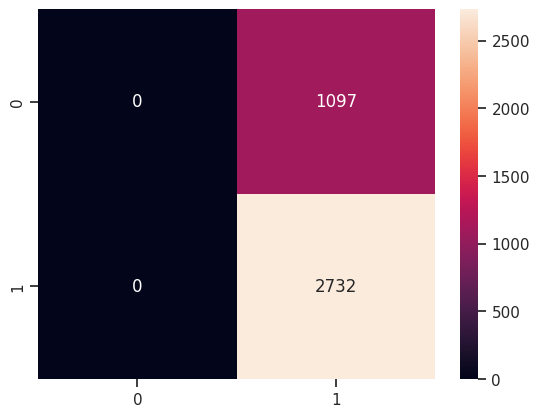

In [ ]:
# Calculate and print the confusion matrix of the model
cm_svm = confusion_matrix(y_test, y_svmpred)
print("Confusion Matrix is :\n", cm_svm)
print('\n')
# Plot the confusion matrix
sns.heatmap(cm_svm, annot=True, fmt="d")


In [ ]:
print(classification_report(y_test,y_svmpred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1097
           1       0.71      1.00      0.83      2732

    accuracy                           0.71      3829
   macro avg       0.36      0.50      0.42      3829
weighted avg       0.51      0.71      0.59      3829



 **Random Forest**

In [ ]:
# Create a Random Forest model with 100 trees
rf_model = RandomForestClassifier(n_estimators=100, random_state=50)

# Fit the model to the training data
fitted_rf_model=rf_model.fit(X_train, y_train)

# Use the model to make predictions on the test data
y_rfpred = rf_model.predict(X_test)

Model Result Visualisation

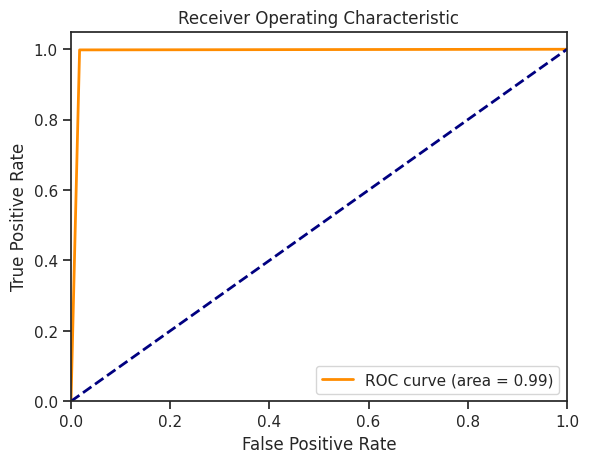

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, y_rfpred)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

Text(0, 0.5, 'Feature names')

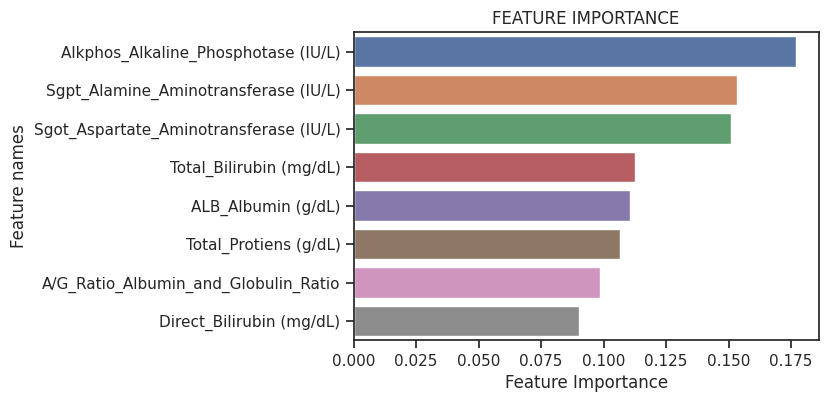

In [ ]:
#Create arrays from feature importance and feature names
feature_importance = np.array(rf_model.feature_importances_)
feature_names = np.array(X_train.columns)

#Create a DataFrame using a Dictionary
data={'feature_names':feature_names,'feature_importance':feature_importance}
fi_df = pd.DataFrame(data)

#Sort the DataFrame in order decreasing feature importance
fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)

#Define size of bar plot
plt.figure(figsize=(6,4))
#Plot Searborn bar chart
sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])
#Add chart labels
plt.title('FEATURE IMPORTANCE')
plt.xlabel('Feature Importance')
plt.ylabel('Feature names')

Model evaluation

In [ ]:
# Compare R2 of train and test set
rf_score=round(rf_model.score(X_train, y_train),10)
rf_scoreTest=round(rf_model.score(X_test, y_test),10)
print('Random Forest Score: ', rf_score)
print('Random Forest Test Score: ', rf_scoreTest)

Random Forest Score:  0.9999347045
Random Forest Test Score:  0.9937320449


In [ ]:
# Calculate and print the accuracy of the model
accuracyrf = accuracy_score(y_test, y_rfpred)
print("Accuracy:", accuracyrf)


Accuracy: 0.9937320449203447


Confusion Matrix is :
 [[1078   19]
 [   5 2727]]




<Axes: >

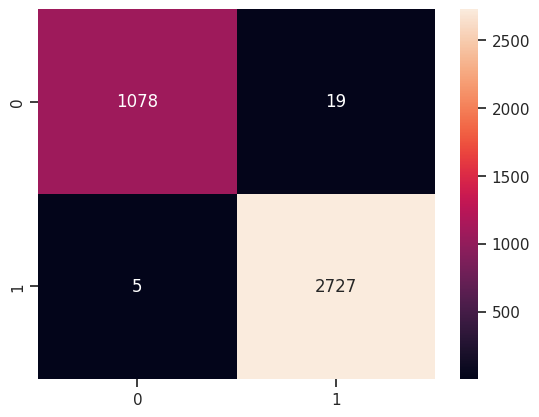

In [ ]:
cm_rf = confusion_matrix(y_test,y_rfpred)
print("Confusion Matrix is :\n", cm_rf)
print('\n')
# Plot the confusion matrix
sns.heatmap(cm_rf,annot=True,fmt="d")

In [ ]:
print(classification_report(y_test,y_rfpred))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99      1097
           1       0.99      1.00      1.00      2732

    accuracy                           0.99      3829
   macro avg       0.99      0.99      0.99      3829
weighted avg       0.99      0.99      0.99      3829



**Logistic Regression**

In [ ]:
# Create a Logistic Regression model
lr_model = LogisticRegression(random_state=50)

# Fit the model to the training data
lr_model.fit(X_train, y_train)

# Use the model to make predictions on the test data
y_lrpred = lr_model.predict(X_test)


Model Result Visualisation


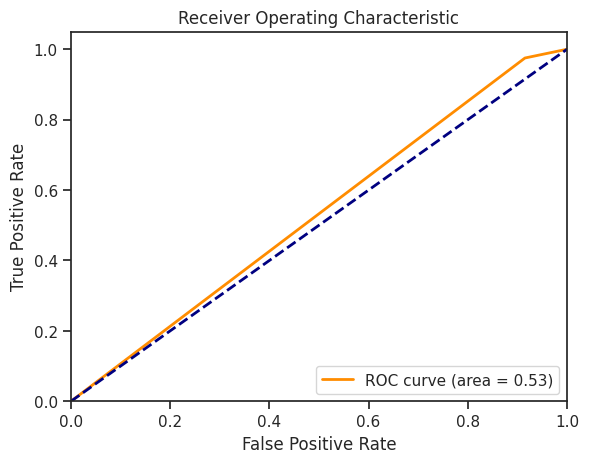

In [ ]:
fpr_lr, tpr_lr, thresholds_lr = roc_curve(y_test, y_lrpred)
roc_auc_lr = auc(fpr_lr, tpr_lr)

# Plot ROC curve
plt.plot(fpr_lr, tpr_lr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_lr)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

Model evaluation

In [ ]:
# Compare R2 of train and test set
lr_score=round(lr_model.score(X_train, y_train),10)
lr_scoreTest=round(lr_model.score(X_test, y_test),10)
print('Logistic Regression Score: ', lr_score)
print('Logistic Regression Test Score: ', lr_scoreTest)

Logistic Regression Score:  0.718445968
Logistic Regression Test Score:  0.7200313398


In [ ]:
# Calculate and print the accuracy of the model
accuracylr = accuracy_score(y_test, y_lrpred)
print("Accuracy:", accuracylr)


Accuracy: 0.7200313397753982


Confusion Matrix is :
 [[  93 1004]
 [  68 2664]]




<Axes: >

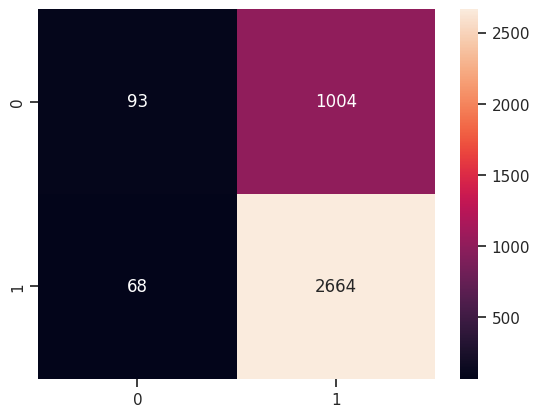

In [ ]:
# Calculate and print the confusion matrix of the model
cm_lr = confusion_matrix(y_test,y_lrpred)
print("Confusion Matrix is :\n", cm_lr)
print('\n')
# Plot the confusion matrix
sns.heatmap(cm_lr,annot=True,fmt="d")


In [ ]:
#display classification report
print(classification_report(y_test,y_lrpred))

              precision    recall  f1-score   support

           0       0.58      0.08      0.15      1097
           1       0.73      0.98      0.83      2732

    accuracy                           0.72      3829
   macro avg       0.65      0.53      0.49      3829
weighted avg       0.68      0.72      0.64      3829



# **Evaluation**

In [ ]:
# Comparing all the models
models = pd.DataFrame({
    'Model': [  'SVM Model','Random Forest','Logistic Regression'],
    'Score': [  svm_score, rf_score,svm_score],
    'Test Score': [ svm_scoreTest, rf_scoreTest,svm_scoreTest],
    'Accuracy':[accuracysvm,accuracyrf,accuracylr]})
models.sort_values(by='Test Score', ascending=False)

#we can see that Random Forest has the highest accuracy, so we will choose randome forest for our prediction model
#The following evaluation and optimization step will be for random forest

,Model,Score,Test Score,Accuracy
1,Random Forest,0.999935,0.993732,0.993732
0,SVM Model,0.712700,0.713502,0.713502
2,Logistic Regression,0.712700,0.713502,0.720031


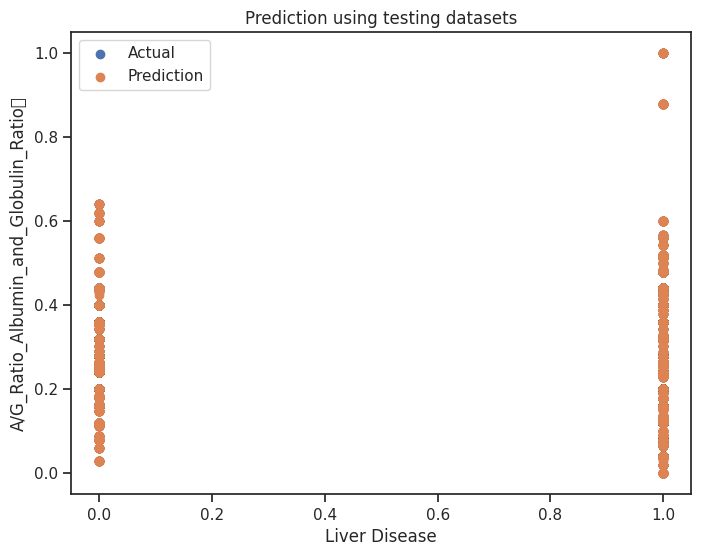

In [ ]:
plt.figure(figsize=[8,6])
plt.title('Prediction using testing datasets')
plt.scatter(x= y_test, y= X_test['A/G_Ratio_Albumin_and_Globulin_Ratio'], label='Actual')
plt.scatter(x=y_rfpred, y= X_test['A/G_Ratio_Albumin_and_Globulin_Ratio'], label='Prediction')
plt.ylabel('A/G_Ratio_Albumin_and_Globulin_Ratio	')
plt.xlabel('Liver Disease')
plt.legend()
plt.show()

Learning Curve

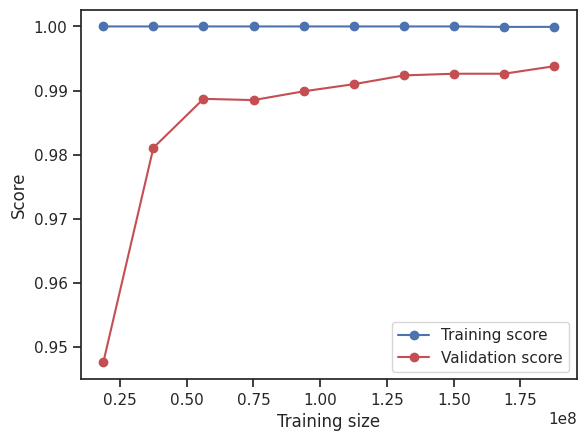

In [ ]:
train_sizes, train_scores, test_scores = learning_curve(estimator=rf_model, X=X_train, y=y_train, train_sizes=np.linspace(0.1, 1.0, 10), cv=5)

train_sizes_abs = np.round(train_sizes * len(X_train))

plt.plot(train_sizes_abs, np.mean(train_scores, axis=1), 'bo-', label='Training score')
plt.plot(train_sizes_abs, np.mean(test_scores, axis=1), 'ro-', label='Validation score')

plt.xlabel('Training size')
plt.ylabel('Score')
plt.legend(loc='best')
plt.show()

**Optimization**

GridSearchCV

In [ ]:
# Define the parameter grid to search over
param_grid = {'n_estimators': [40,50, 100, 200],
              'max_depth': [None, 10, 20],
              'max_features': ['sqrt', 'log2']
              }

# Create a Random Forest model with 100 trees
rf_modelGS = RandomForestClassifier(n_estimators=100, random_state=50)

# Initialize the GridSearchCV object with 5-fold cross validation
grid_search = GridSearchCV(rf_modelGS, param_grid, cv=5, scoring='accuracy')

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train, y_train)

# Use the best hyperparameters to fit the model to the training data
rf_modelGS = RandomForestClassifier(**grid_search.best_params_)
rf_modelGS.fit(X_train, y_train)

# Evaluate the model on the test set
y_gspred = rf_modelGS.predict(X_test)

# Print the best parameters and the corresponding mean cross-validated score
print("Best parameters: ", grid_search.best_params_)
print("Best CV score: ", grid_search.best_score_)
#display classification report
print("\nClassification Report")
print(classification_report(y_test,y_gspred))

Best parameters:  {'max_depth': None, 'max_features': 'sqrt', 'n_estimators': 200}
Best CV score:  0.9939928174991838

Classification Report
              precision    recall  f1-score   support

           0       0.99      0.98      0.99      1097
           1       0.99      1.00      1.00      2732

    accuracy                           0.99      3829
   macro avg       0.99      0.99      0.99      3829
weighted avg       0.99      0.99      0.99      3829



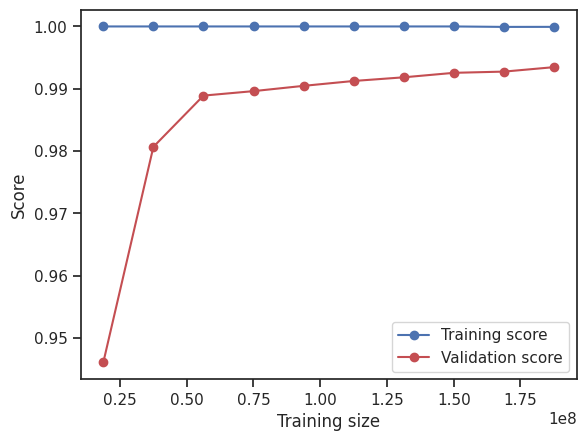

In [ ]:
train_sizes, train_scores, test_scores = learning_curve(estimator=rf_modelGS, X=X_train, y=y_train, train_sizes=np.linspace(0.1, 1.0, 10), cv=5)

train_sizes_abs = np.round(train_sizes * len(X_train))

plt.plot(train_sizes_abs, np.mean(train_scores, axis=1), 'bo-', label='Training score')
plt.plot(train_sizes_abs, np.mean(test_scores, axis=1), 'ro-', label='Validation score')

plt.xlabel('Training size')
plt.ylabel('Score')
plt.legend(loc='best')
plt.show()

# **Save model for later use**

In [ ]:
# Save the model into a file call liverdisease.sav
filename = "liverdisease_model.sav"
pk.dump(fitted_rf_model, open(filename, 'wb'))